# Actividad: Problemas de regresión 

Alan Vilchis A01640260

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, ShuffleSplit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('/home/alanv/Documents/7/omar/crime_data.csv')
df.drop(['State','MR','S'],inplace=True,axis=1)
# Dependiente es VR
df.head(5)

1. Grafica cada variable predictora vs la variable de respuesta

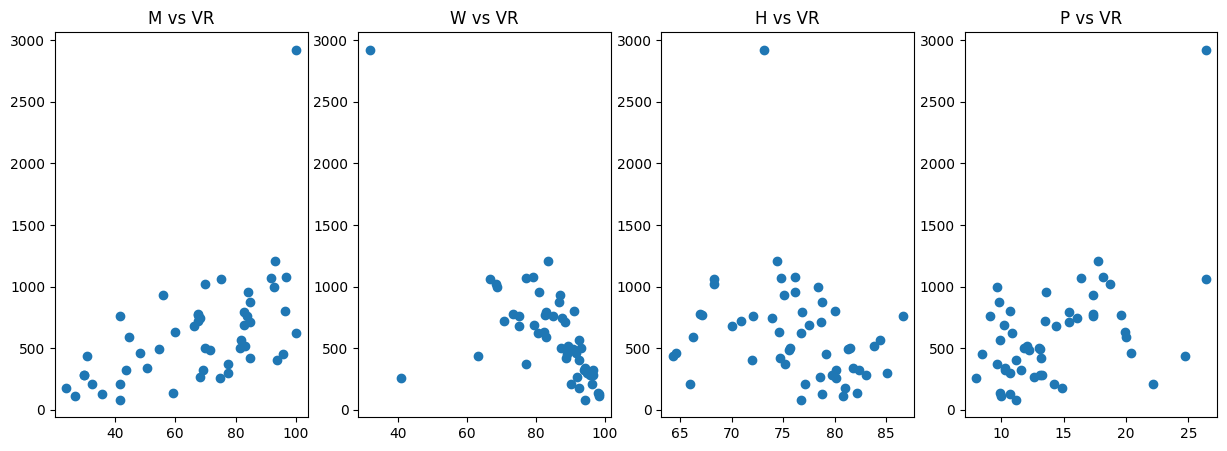

In [3]:
fig, ax = plt.subplots(1,4 , figsize=(15, 5))
ax[0].scatter(df['M'] ,df['VR'],label='Graph 1')
ax[0].set_title('M vs VR')
ax[1].scatter(df['W'],df['VR'],label='Graph 2')
ax[1].set_title('W vs VR')
ax[2].scatter(df['H'] ,df['VR'],label='Graph 3')
ax[2].set_title('H vs VR')
ax[3].scatter(df['P'],df['VR'],label='Graph 4')
ax[3].set_title('P vs VR')

plt.show()

2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal

In [4]:
def fit_model(X, y):
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y
# Predict function (it evaluates an array of observations using the specified linear model).
def predict(X, beta):
    return X @ beta

x = np.array([df['M'],df['W'],df['H'],df['P']]).T
X = np.column_stack((np.ones(x.shape[0]), x))
y = np.array(df['VR'])
beta = fit_model(X,y)
print("Coefficients:", beta)
y_pred = predict(X,beta)
y_pred


Coefficients: [-2014.12471071     9.09424116   -13.08150065    29.02038939
    63.28190064]


array([ 471.31673749,  679.90596672,  497.62129419,  855.58247246,
       1191.00967082,  595.55708654,  528.25160529,  593.85344558,
       1024.86921462,  587.23643591,  960.97012249,   96.86685555,
        135.63934346,  762.17751401,  417.81962277,  481.66300289,
        391.73215308, 1448.1420549 ,  667.76406741,  817.53843833,
        -14.06509507,  854.2035039 ,  511.79527333,  624.51787943,
        866.08348497,  286.34197652,  547.78125552,   66.53951321,
        238.12980892,  256.05297423,  753.95073572,  636.29040154,
        529.87014319, 1018.47365009,  600.11397353,  877.44625022,
        515.16447234,  599.88200756,  423.97462462,  888.7265147 ,
        238.47120303,  706.00054226,  829.12156314,  597.30419112,
        478.26299712,  -78.13339479,  768.83077574,  478.74145614,
        426.46995063,  251.79993674, 2271.34032589])

3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.

In [5]:
x = df.iloc[:, 1:].values
y = np.array(df['VR'])
# Evaluate linear regression model using k-fold cross-validation
from sklearn import linear_model
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)
mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    #print('a',x_train)
    regr_cv = linear_model.LinearRegression()
    regr_cv.fit(x_train, y_train)
    # Test phase
    x_test = x[test_index]
    y_test = y[test_index]
    y_pred =regr_cv.predict(x_test)
    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)
    r2_cv.append(r2_i)
print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:',
np.average(r2_cv))

mse =  188275.9226900601
mae =  298.5080030039882
r^2=  0.6276831267422318
mse =  42428.301883003944
mae =  181.14683877515648
r^2=  0.6319660083367942
mse =  193573.34696674283
mae =  370.72950716622836
r^2=  -1.1032376279160534
mse =  9964.174111154396
mae =  89.78830359677059
r^2=  0.8951331197672258
mse =  13641.912032116801
mae =  101.55196814509368
r^2=  0.7686202057818388
MSE: 89576.73153661561  MAE: 208.34492413744746  R^2: 0.3640329665424074


4. Utiliza el método de validación cruzada Monte Carlo

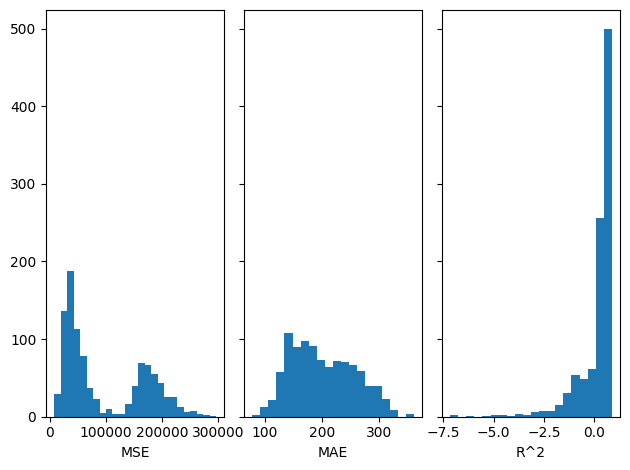

In [6]:
# Find histograms of MSE and MAE and R^2 using Shuffle Split (Monter Carlo)
kf = ShuffleSplit(n_splits=1000, test_size = 0.2)
mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    regr_cv = linear_model.LinearRegression()
    regr_cv.fit(x_train, y_train)
    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = regr_cv.predict(x_test)
    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(mse_cv, bins=25)
axs[0].set_xlabel("MSE")
axs[1].hist(mae_cv, bins=20)
axs[1].set_xlabel("MAE")
axs[2].hist(r2_cv, bins=20)
axs[2].set_xlabel("R^2")
plt.show()

5. Repite los pasos 1, 2 y 3 pero con este nuevo conjunto de datos 

In [7]:
#Adding data 
x = np.array([df['M'],df['W'],df['H'],df['P'],df['P']**2, df['H']**3,df['W']*df['M'],df['M']*df['P']**2]).T
X = np.column_stack((np.ones(x.shape[0]), x))
y = np.array(df['VR'])
beta = fit_model(X,y)
print("Coefficients:", beta)
y_pred = predict(X,beta)


Coefficients: [ 1.81681346e+03  1.88589943e+01  1.61293851e+00 -5.73914844e+01
  8.98146706e+01 -3.32605234e+00  4.02718450e-03 -1.83973900e-01
  2.95810994e-02]


Text(0.5, 1.0, 'M*P^2 vs VR')

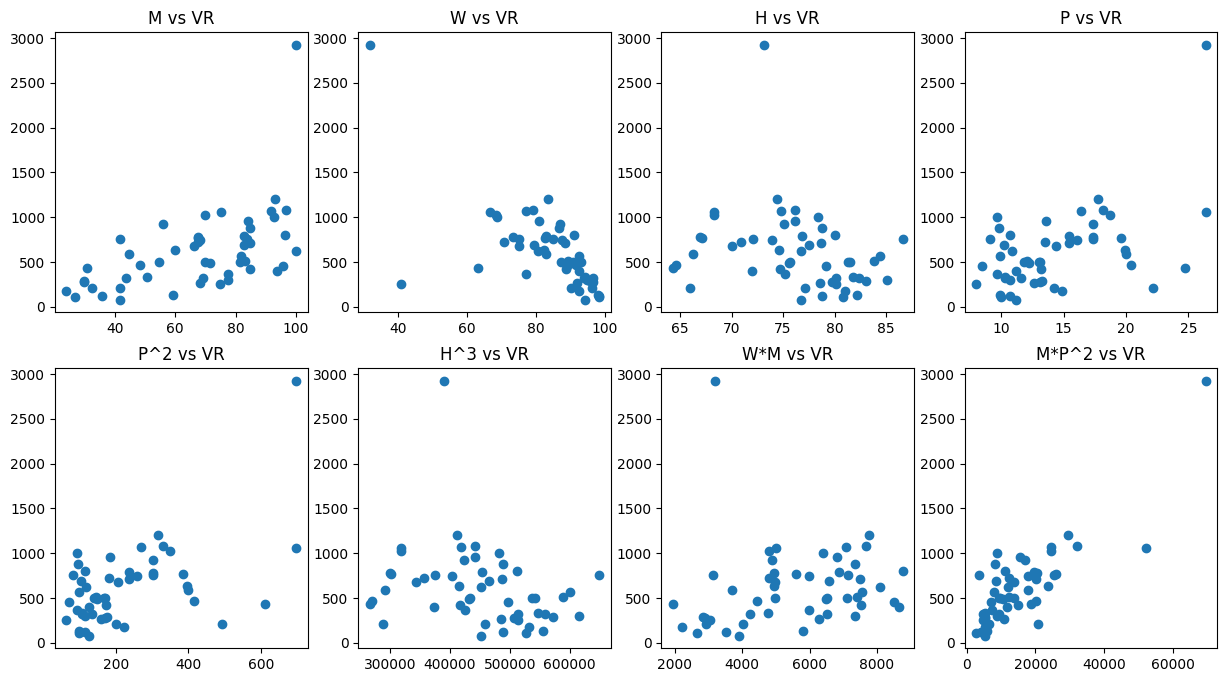

In [8]:
fig, ax = plt.subplots(2,4 , figsize=(15, 8))
ax[0, 0].scatter(df['M'] ,df['VR'],label='Graph 1')
ax[0, 0].set_title('M vs VR')
ax[0, 1].scatter(df['W'],df['VR'],label='Graph 2')
ax[0, 1].set_title('W vs VR')
ax[0, 2].scatter(df['H'] ,df['VR'],label='Graph 3')
ax[0, 2].set_title('H vs VR')
ax[0, 3].scatter(df['P'],df['VR'],label='Graph 4')
ax[0, 3].set_title('P vs VR')
ax[1,0].scatter(x[:,4],df['VR'],label='Graph 5')
ax[1, 0].set_title('P^2 vs VR')
ax[1,1].scatter(x[:,5],df['VR'],label='Graph 6')
ax[1, 1].set_title('H^3 vs VR')
ax[1,2].scatter(x[:,6],df['VR'],label='Graph 7')
ax[1, 2].set_title('W*M vs VR')
ax[1,3].scatter(x[:,7],df['VR'],label='Graph 8')
ax[1, 3].set_title('M*P^2 vs VR')

Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE. 

In [9]:

# Evaluate linear regression model using k-fold cross-validation

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)
mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    #print('a',x_train)
    regr_cv = linear_model.LinearRegression()
    regr_cv.fit(x_train, y_train)
    # Test phase
    x_test = x[test_index]
    y_test = y[test_index]
    y_pred =regr_cv.predict(x_test)
    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)
    r2_cv.append(r2_i)
print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:',
np.average(r2_cv))

mse =  110850.73244367399
mae =  221.80828204124353
r^2=  -0.26495198627366157
mse =  37663.3804865193
mae =  140.334316189304
r^2=  0.23336222751751945
mse =  46165.120073654754
mae =  163.8010904779152
r^2=  0.5497168722482373
mse =  160636.6868088749
mae =  226.4788047302747
r^2=  0.7256749688378765
mse =  27942.953393637268
mae =  140.53140764633142
r^2=  0.7406595239532112
MSE: 76651.77464127204  MAE: 178.59078021701376  R^2: 0.3968923212566366


6. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original

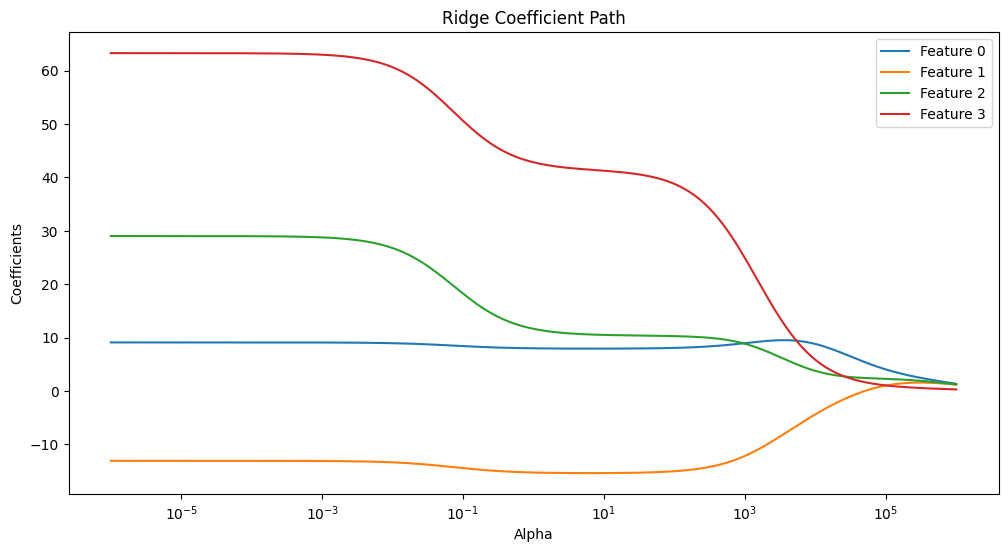

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data for demonstration
x = np.array([df['M'],df['W'],df['H'],df['P']]).T
X = np.column_stack((np.ones(x.shape[0]), x))
y = np.array(df['VR'])

n_features= 4

# Regularization parameter
alphas = np.logspace(-6, 6, 200)  # Range of alpha values
coefs_path = []

for a in alphas:
    XTX = np.dot(X.T, X)
    identity_matrix = np.identity(n_features + 1)  # Identity matrix
    XTX_reg = XTX + a * identity_matrix
    XTX_inv_reg = np.linalg.inv(XTX_reg)
    coef = np.dot(np.dot(XTX_inv_reg, X.T), y)
    coefs_path.append(coef)

coefs_path = np.array(coefs_path)  # Convert list of coefs to array

# Plot Ridge Coefficient Path (Ridge Graph)
plt.figure(figsize=(12, 6))
for feature_index in range(n_features ):
    plt.plot(alphas, coefs_path[:, feature_index +1], label=f'Feature {feature_index }')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficient Path')
plt.legend()
plt.axis('tight')
plt.show()



7. Utiliza una librería para generar el gráfico de Lasso

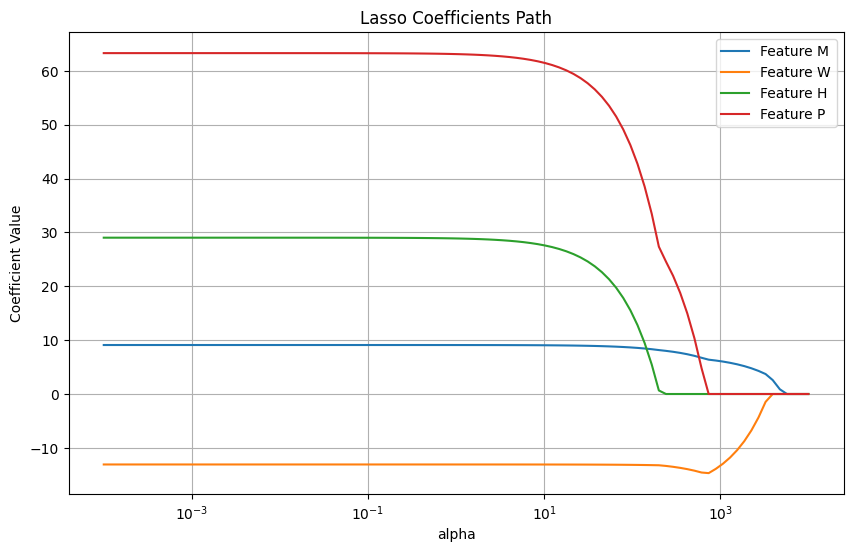

In [11]:

# Load the diabetes dataset
data = load_diabetes()
X = np.array([df['M'],df['W'],df['H'],df['P']]).T
y = np.array(df['VR'])
featuresDict = ['M', 'W', 'H', 'P']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of alpha values
alphas = np.logspace(-4, 4, 100)

coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(alphas, np.array(coefs)[:, i], label=f'Feature {featuresDict[i]}')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients Path')
plt.legend()
plt.grid(True)
plt.show()



Segun la grafica de Lasso, las variables mas importantes son el porcentaje de area metropolitana y el porcentaje de gente blanca

### 8. Conclusión problema 1

Considero que este modelo no es efectivo por que las r^2 obtenidas son inconsistentes, se puede conseguir tanto .80 como -.12 utilizando el modelo de regresion lineal, esto lo pude observar aplicando metodos de validación cruzanda y Monte Carlo.

Cuando probe escalar las variables obtuve peores resultados, sin embargo esto se puede deber a las combinaciones que hize para este nuevo modelo (cuadrático y cubico), por otra parte se le agrega complejidad al modelo por que son mas variables y esto puede causar un peor resultado.

Para el modelo Lasso las variables en orden mas importantes son 'M', 'W', 'P' y la menos importante 'H'. Para el metodo de Ridge el resultado es parecido, su variable mas importante es 'W', posteriormente siguen 'M', 'H' y finalmente 'P'

Algo que me parecio interesante del modelo es que para cada variable hay un dato que esta muy diferente a los otros, por lo que es posible que esta medición afecte al modelo de una manera negativa ya que solo tenemos 50 mediciones.

# Ejercicio 2

In [4]:
# Leer y limpiar datos
import pandas as pd
import numpy as np
df = pd.read_csv('/home/alanv/Documents/7/omar/life_expectancy_data.csv')
df.drop(['Country','Year','percentage expenditure','Status','under-five deaths ',' HIV/AIDS', ' thinness 5-9 years'],inplace=True,axis=1)
df.dropna(inplace=True)
x = df.iloc[:, 1:].values
y = np.array(df['Life expectancy '])

1. Evalúa con validación cruzada un modelo de regresión lineal

In [13]:
#Limpiar datos

# Evalúa con validación cruzada un modelo de regresión
# lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)
mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    #print('a',x_train)
    regr_cv = linear_model.LinearRegression()
    regr_cv.fit(x_train, y_train)
    # Test phase
    x_test = x[test_index]
    y_test = y[test_index]
    y_pred =regr_cv.predict(x_test)
    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)
    r2_cv.append(r2_i)
print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:',
np.average(r2_cv))



mse =  15.10303403591862
mae =  2.934046745120259
r^2=  0.8172720352424445
mse =  23.330594055730263
mae =  3.398286733478169
r^2=  0.6523871427021171
mse =  18.64093940094074
mae =  3.1328358770298963
r^2=  0.7574882076496504
mse =  15.849844270593602
mae =  2.9181180471366464
r^2=  0.7818505024823675
mse =  20.776120884679777
mae =  3.222722622041928
r^2=  0.7618997744999849
MSE: 18.740106529572603  MAE: 3.12120200496138  R^2: 0.754179532515313


2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada

---- n features = 1
MSE: 37.455501069927934  MAE: 4.556635172563096  R^2: 0.5150696032689794
---- n features = 2
MSE: 31.985579827566436  MAE: 4.177656516390863  R^2: 0.5854208158978527
---- n features = 3
MSE: 30.849662545479173  MAE: 4.132256441739769  R^2: 0.6013449541730767
---- n features = 4
MSE: 30.311233300057392  MAE: 4.091280203922175  R^2: 0.6073164307289786
---- n features = 5
MSE: 29.116611784082103  MAE: 4.04731786542821  R^2: 0.6229342040148208
---- n features = 6
MSE: 28.94731153191759  MAE: 4.025042152520049  R^2: 0.6239198003031836
---- n features = 7
MSE: 28.855804145294115  MAE: 4.02985511603051  R^2: 0.6224075731287417
---- n features = 8
MSE: 29.187205970287984  MAE: 4.036296344297083  R^2: 0.6214181173523587
---- n features = 9
MSE: 29.049730788925995  MAE: 4.032209765256544  R^2: 0.6227929100846179
---- n features = 10
MSE: 28.874847878583967  MAE: 4.028654082903706  R^2: 0.6261660470493798
---- n features = 11
MSE: 29.2458393264855  MAE: 4.0421767782837135  R^2

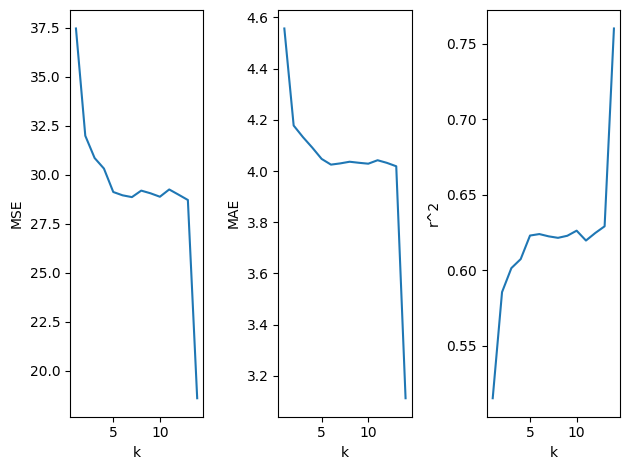

In [9]:
from sklearn.feature_selection import SelectKBest, r_regression
# Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada.
#  Una vez que tengas el número óptimo, muestra las características seleccionadas.

x = df.iloc[:, 1:].values
y = np.array(df['Life expectancy '])
# Find optimal number of features using cross-validation
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []
    kf = KFold(n_splits=5, shuffle = True)
    for train_index, test_index in kf.split(x):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        fselection_cv = SelectKBest(r_regression, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        regr_cv = linear_model.LinearRegression()
        regr_cv.fit(x_train, y_train)
        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")
plt.show()




En este caso la mejores variables serian todas, ya que cada vez que se incrementa el numero de k aumenta la r^2 y disminuye tanto el MSE y MAE

3. Encuentra el número óptimo de predictores para el modelo utilizando el método wrapper y validación cruzada

---- n features = 1
MSE: 37.52908470907968  MAE: 4.24407844332222  R^2: 0.5090916921848996
---- n features = 2
MSE: 23.827012094368595  MAE: 3.2734313147248173  R^2: 0.6911733035928085
---- n features = 3
MSE: 19.950330073310074  MAE: 3.150131218184021  R^2: 0.7394894380558766
---- n features = 4
MSE: 19.32043734253997  MAE: 3.1396132624105593  R^2: 0.7474851100525348
---- n features = 5
MSE: 19.32243700836055  MAE: 3.137301406985551  R^2: 0.749427686211815
---- n features = 6
MSE: 18.837063097719295  MAE: 3.1081652201738312  R^2: 0.756619795189165
---- n features = 7
MSE: 18.717101699768445  MAE: 3.118701243043469  R^2: 0.7569657511407852
---- n features = 8
MSE: 18.60585490417259  MAE: 3.115109462514129  R^2: 0.7592986654755267
---- n features = 9
MSE: 18.80767448155364  MAE: 3.1286464746852936  R^2: 0.7551898440569662
---- n features = 10
MSE: 18.622485248910404  MAE: 3.1191519679268933  R^2: 0.7598279084229537
---- n features = 11
MSE: 18.70827100996998  MAE: 3.1238393021019357  R^

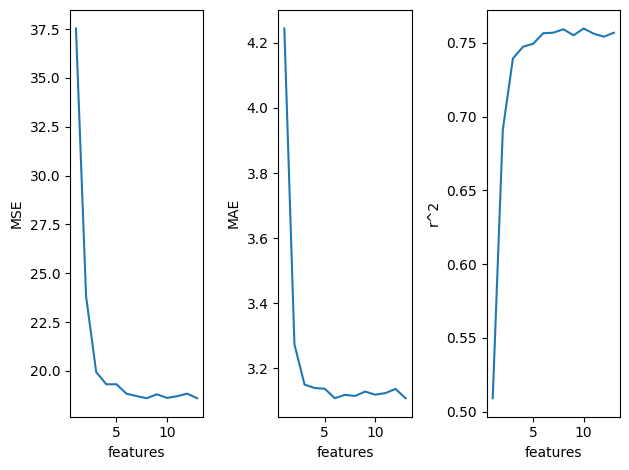

array([[2.63e+02, 6.20e+01, 1.00e-02, ..., 1.72e+01, 4.79e-01, 1.01e+01],
       [2.71e+02, 6.40e+01, 1.00e-02, ..., 1.75e+01, 4.76e-01, 1.00e+01],
       [2.68e+02, 6.60e+01, 1.00e-02, ..., 1.77e+01, 4.70e-01, 9.90e+00],
       ...,
       [7.30e+01, 2.50e+01, 4.43e+00, ..., 1.20e+00, 4.27e-01, 1.00e+01],
       [6.86e+02, 2.50e+01, 1.72e+00, ..., 1.60e+00, 4.27e-01, 9.80e+00],
       [6.65e+02, 2.40e+01, 1.68e+00, ..., 1.10e+01, 4.34e-01, 9.80e+00]])

In [10]:
from sklearn.feature_selection import SequentialFeatureSelector
# Repite el paso anterior pero con selección de características secuencial (Wrapper)
 
x = df.iloc[:, 1:].values
y = np.array(df['Life expectancy '])

# Find optimal number of features using cross-validation
n_feats = [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []
    kf = KFold(n_splits=5, shuffle = True)
    for train_index, test_index in kf.split(x):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        regr_cv = linear_model.LinearRegression()
        fselection_cv = SequentialFeatureSelector(regr_cv,n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        regr_cv.fit(x_train, y_train)
        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()
x


Viendo los resultados se pueden asumir conclusiones diferentes al metodo filter, por un lado se puede ver con 5 variables que ya no mejora mucho mas el modelo, sin embargo se puede ver un pico notorio para 10 variables, por eso es por lo que lo eligo, las variables son las siguientes:

In [16]:
regr = linear_model.LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select = 10)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
df.columns[1:]

Selected features:  ['x0' 'x1' 'x2' 'x3' 'x5' 'x8' 'x9' 'x10' 'x12' 'x13']


Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B',
       'Measles ', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

4. Encuentra el número óptimo de predictores para el modelo utilizando el método filter wrapper

---- n features = 1
MSE: 37.335739236591394  MAE: 4.246104185145866  R^2: 0.5156841735621317
---- n features = 2
MSE: 32.10754487569488  MAE: 4.183422370875017  R^2: 0.584838932048305
---- n features = 3
MSE: 31.34842796470945  MAE: 4.157807356154661  R^2: 0.5913337251929941
---- n features = 4
MSE: 30.48964864079943  MAE: 4.138542225896471  R^2: 0.6043610378353089
---- n features = 5
MSE: 30.28944961842293  MAE: 4.12993475267375  R^2: 0.6072805711696848
---- n features = 6
MSE: 21.674591495508576  MAE: 3.3540860324400796  R^2: 0.719702119643586
---- n features = 7
MSE: 19.097913117128265  MAE: 3.1340157649604157  R^2: 0.7523853911421309
---- n features = 8
MSE: 18.913204199034976  MAE: 3.115664553577293  R^2: 0.7547690428039233
---- n features = 9
MSE: 18.98299041548599  MAE: 3.121196344669433  R^2: 0.7511612875568068
---- n features = 10
MSE: 18.887832207389536  MAE: 3.116204800187327  R^2: 0.7547755959769972
---- n features = 11
MSE: 19.11345646337707  MAE: 3.128843466688746  R^2: 0

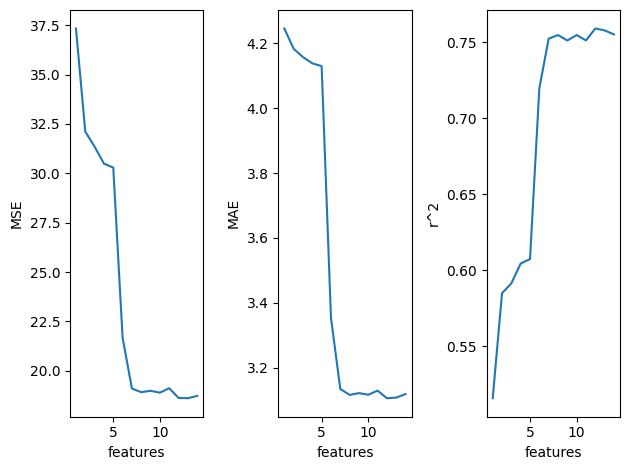

In [17]:
#Ahora con filter wrapper
from sklearn.feature_selection import RFE
# Find optimal number of features using cross-validation
x = df.iloc[:, 1:].values
y = np.array(df['Life expectancy '])
n_feats = [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,14]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []
    kf = KFold(n_splits=5, shuffle = True)
    for train_index, test_index in kf.split(x):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        regr_cv = linear_model.LinearRegression()
        fselection_cv = RFE(regr_cv,n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        regr_cv.fit(x_train, y_train)
        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()

En este caso se nota mucho que con 7 variables es donde esta el mayor pico, estas 7 variables son:



In [18]:
regr = linear_model.LinearRegression()
fselection = RFE(regr, n_features_to_select = 7)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
df.columns[1:]

Selected features:  ['x0' 'x2' 'x5' 'x8' 'x11' 'x12' 'x13']


Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B',
       'Measles ', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

5. Impelentacion de los pasos anteriores pero con un modelo no lineal knn

In [19]:
### Impelentacion de los pasos anteriores pero con un modelo no lineal como knn

import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x = df.iloc[:, 1:].values
y = np.array(df['Life expectancy '])

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)
mse_cv = []
mae_cv = []
r2_cv = []

for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    # Initialize kNN regressor
    k_neighbors = 5  # You can adjust this value
    regr_cv = KNeighborsRegressor(n_neighbors=k_neighbors)
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index]
    y_test = y[test_index]
    y_pred = regr_cv.predict(x_test)

    # Calculate MSE, MAE, and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    print('r^2 = ', r2_i)
    r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv), ' R^2:', np.average(r2_cv))



mse =  84.63127999999999
mae =  7.004969696969696
r^2 =  0.01067748114694389
mse =  73.14774181818181
mae =  6.577151515151515
r^2 =  0.0060996746468604535
mse =  64.08419393939396
mae =  6.137333333333333
r^2 =  0.09190193479625741
mse =  77.90113212121211
mae =  6.807515151515152
r^2 =  0.05028438337446184
mse =  69.1899623100304
mae =  6.395866261398176
r^2 =  0.07048016205706742
MSE: 73.79086203776366  MAE: 6.584567191673574  R^2: 0.045888727204318205


---- n features = 1


MSE: 26.60335088514322  MAE: 3.476102938196555  R^2: 0.6481571369252659
---- n features = 2
MSE: 10.95621727254306  MAE: 2.0750958828405635  R^2: 0.8571284728960661
---- n features = 3
MSE: 8.717474146449296  MAE: 1.9889184489269596  R^2: 0.8877170186211438
---- n features = 4
MSE: 21.78770286966934  MAE: 3.2432942801878974  R^2: 0.7163623103256391
---- n features = 5
MSE: 19.748631909367226  MAE: 3.082095311780418  R^2: 0.7433982385470829
---- n features = 6
MSE: 18.80149510840932  MAE: 3.0108329372754907  R^2: 0.7572270050543397
---- n features = 7
MSE: 18.81438288809063  MAE: 3.00252950170397  R^2: 0.7570278143985534
---- n features = 8
MSE: 19.180937300543427  MAE: 3.0614543243990058  R^2: 0.7519885175418439
---- n features = 9
MSE: 19.428318524085846  MAE: 3.0891391360412634  R^2: 0.746063557183105
---- n features = 10
MSE: 18.684388504375057  MAE: 3.035140793957815  R^2: 0.7551657001049124
---- n features = 11
MSE: 20.436363078566824  MAE: 3.1766830247766413  R^2: 0.7343804903452

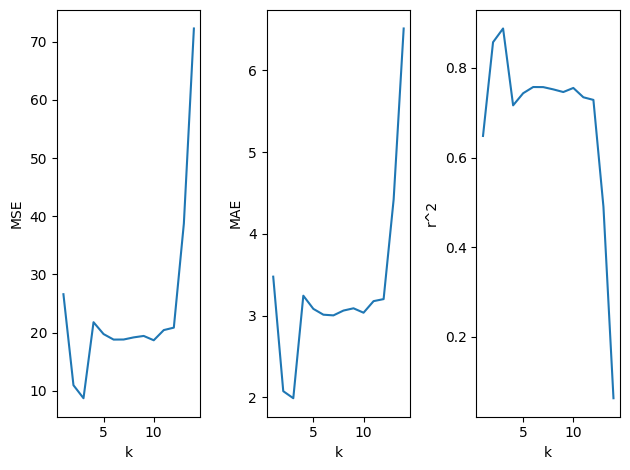

In [20]:

from sklearn.feature_selection import SelectKBest, f_regression


# Find optimal number of features using cross-validation
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []
    kf = KFold(n_splits=5, shuffle=True)
    
    for train_index, test_index in kf.split(x):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        
        # Feature selection
        fselection_cv = SelectKBest(k=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        
        # Initialize kNN regressor
        k_neighbors = 5  # You can adjust this value
        regr_cv = KNeighborsRegressor(n_neighbors=k_neighbors)
        regr_cv.fit(x_train, y_train)
        
        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
        
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")
plt.show()


In [21]:
fselection = SelectKBest(f_regression, k=2)
fselection.fit(x, y)
selected_features = fselection.get_support()

# Get the column names from the dataframe
selected_column_names = df.columns[1:][selected_features]

print("Mejores variables: ", selected_column_names)

Mejores variables:  Index(['Income composition of resources', 'Schooling'], dtype='object')


---- n features = 1
MSE: 72.1459044008474  MAE: 6.561898646034817  R^2: 0.06301027562261421
---- n features = 2
MSE: 70.09538102385557  MAE: 6.460312572533849  R^2: 0.09325686236391909
---- n features = 3


MSE: 73.94816353688864  MAE: 6.632416542322924  R^2: 0.043744509673168584
---- n features = 4
MSE: 73.42714732835958  MAE: 6.627289085382704  R^2: 0.049556437747119333
---- n features = 5
MSE: 76.55777862319242  MAE: 6.747271990420927  R^2: 0.006079578035025834
---- n features = 6
MSE: 73.69114042774247  MAE: 6.622709809339597  R^2: 0.04374072537584182
---- n features = 7
MSE: 73.91578734457032  MAE: 6.665622768720641  R^2: 0.042749586999220934
---- n features = 8
MSE: 72.01286015142304  MAE: 6.523809781707655  R^2: 0.06826496734287804
---- n features = 9
MSE: 73.40219227852998  MAE: 6.621072708851432  R^2: 0.04750374080728437
---- n features = 10
MSE: 73.43466185281386  MAE: 6.627512462006078  R^2: 0.0464887221339507
---- n features = 11
MSE: 70.81025091719627  MAE: 6.496759988947223  R^2: 0.0795765633138241
---- n features = 12
MSE: 71.69684510785666  MAE: 6.510692640692641  R^2: 0.0702696386430595
---- n features = 13
MSE: 72.99370889564338  MAE: 6.52449704338215  R^2: 0.05156235329

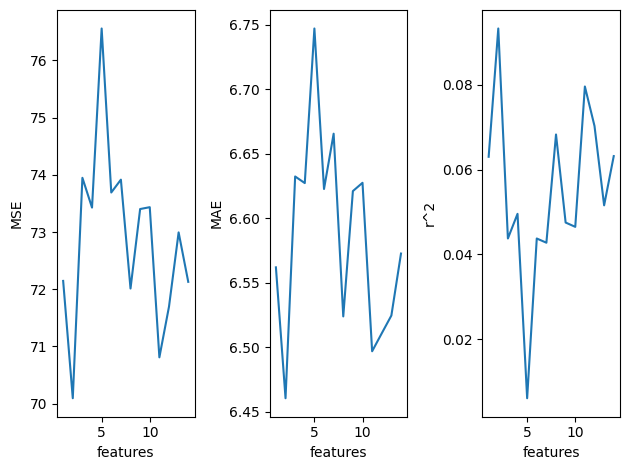

In [22]:
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []
    kf = KFold(n_splits=5, shuffle=True)
    
    for train_index, test_index in kf.split(x):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        
        # Initialize kNN regressor
        k_neighbors = 5  
        regr_cv = KNeighborsRegressor(n_neighbors=k_neighbors)
        regr_cv.fit(x_train, y_train)
        
        # Feature selection
        fselection_cv = SelectKBest(score_func=f_regression, k=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train_selected = fselection_cv.transform(x_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
        
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()



El mejor numero de features son 8 aun asi el modelo es muy malo 

---- n features = 1
MSE: 70.37027591489363  MAE: 6.457421645021645  R^2: 0.08821455391669183
---- n features = 2
MSE: 74.65363425329281  MAE: 6.641304006631667  R^2: 0.028649153279945085
---- n features = 3
MSE: 72.79552082601087  MAE: 6.592485106382978  R^2: 0.05752468633117036
---- n features = 4
MSE: 71.64643229547758  MAE: 6.507330533296491  R^2: 0.06572899738738705
---- n features = 5
MSE: 70.58776955991526  MAE: 6.50327331675417  R^2: 0.08231295986795042
---- n features = 6
MSE: 74.14073064382427  MAE: 6.648587381412914  R^2: 0.03628026215519513
---- n features = 7
MSE: 72.44565596094685  MAE: 6.557483724785851  R^2: 0.06022655817811249
---- n features = 8
MSE: 72.65026522612139  MAE: 6.5717697706548766  R^2: 0.05512199018904338
---- n features = 9
MSE: 70.94178979976053  MAE: 6.492715851524362  R^2: 0.08124294203736841
---- n features = 10
MSE: 72.27029739780787  MAE: 6.550156323109515  R^2: 0.06554098407319582
---- n features = 11
MSE: 73.43536242940039  MAE: 6.57519959473151  

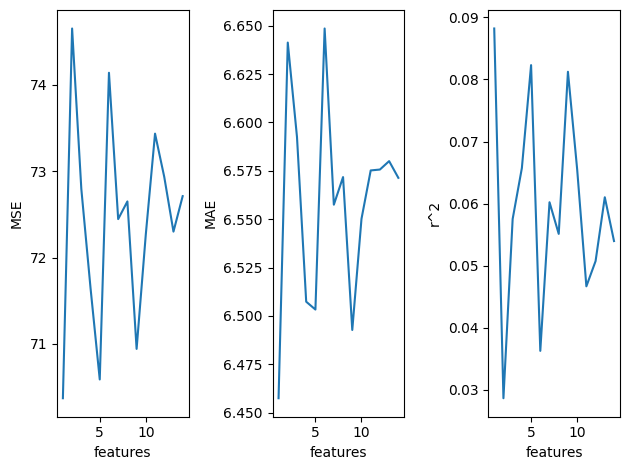

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []
    kf = KFold(n_splits=5, shuffle=True)
    
    for train_index, test_index in kf.split(x):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        
        # Initialize kNN regressor
        k_neighbors = 5
        regr_cv = KNeighborsRegressor(n_neighbors=k_neighbors)
        regr_cv.fit(x_train, y_train)
        
        # Feature selection using SelectKBest and mutual information
        fselection_cv = SelectKBest(score_func=mutual_info_regression, k=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train_selected = fselection_cv.transform(x_train)
        
        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
        
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()


6. Agregue la variables "Status" y utiliza un árbol de decisión para generar un modelo de regresión

In [24]:
dfTree = pd.read_csv('/home/alanv/Documents/7/omar/life_expectancy_data.csv')
dfTree.drop(['Country','Year','percentage expenditure','under-five deaths ',' HIV/AIDS', ' thinness 5-9 years'],inplace=True,axis=1)
dfTree.dropna(inplace=True)
x = dfTree.iloc[:, 1:].values
y = np.array(dfTree['Life expectancy '])


import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)
mse_cv = []
mae_cv = []
r2_cv = []

# Hyperparameters to adjust
max_depth = 10
min_samples_split = 2
min_samples_leaf = 1

for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    
    # Initialize Decision Tree Regressor with adjusted hyperparameters
    regr_cv = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    regr_cv.fit(x_train, y_train)
    
    # Test phase
    x_test = x[test_index]
    y_test = y[test_index]
    y_pred = regr_cv.predict(x_test)
    
    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv), ' R^2:', np.average(r2_cv))


MSE: 0.007639421571336476  MAE: 0.028985907709313852  R^2: 0.9999015930259334


### 7. Conclusión problema 2

Yo considero que sí es un modelo aceptable, a diferencia del problema anterior, ya que el valor de r^2 es considerablemente alto y los errores son aceptables, además de que los resultados son estables y no hay mucha variabilidad.

Todos los métodos lineales funcionan correctamente, dan un valor de r^2 parecido aunque con diferente numero de variables. Por otra parte, el único modelo no lineal que me dio un buen resultado fue con el método filter, y probablemente sea porque este modelo no tiene en cuenta las interacciones entre variables; este mismo fue el modelo más sobresaliente, con una suma de errores cuadrados de 2, algo que destacar es que el numero de variables recomendadas son solamente 2 o 3.
Al agregar la variable Status, mejora mucho el modelo, con unos errores muy bajos y una r cuadrada de 0.9999.

Me pareció interesante que para cada método tiene un número de variables optimas diferentes al resto. Hay algunos que recomiendan usar todas las características, mientras que otros solo recomiendan 2. Para los metodos lineales el valor de r cuadrada es practicamente el mismo pero cuando tiene el mejor numero de variables, filter fue con el maximo numero de variables, wrapper con 8 y filter-wrapper con 7, el metodo de filter se debe a que como deprecia la interaccion entre variables el que tenga mas no hace mas complejo el modelo, caso contrario para los otros metodos.